In [536]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
from sympy import *

In [537]:
Ainit = 1e-5
kon = 1e5
rho = 1
k = kon*Ainit*rho
rtot = 1e5
Atot = 1e5
koff = 1e-4
delta = 4

In [538]:
def func(x):
    return (2/rtot)*k*(rtot-x-(((delta/rtot)*k*(rtot-x)*x)/(koff+(delta/rtot)*k*x)))*(Atot-x-(((delta/rtot)*k*(rtot-x)*x)/(2*koff+2*(delta/rtot)*k*x))) - koff*x - (delta/rtot)*k*(rtot-x-(((delta/rtot)*k*(rtot-x)*x)/(koff+(delta/rtot)*k*x)))*x + 2*koff*(((delta/rtot)*k*(rtot-x)*x)/(2*koff+2*(delta/rtot)*k*x))

roots = fsolve(func, 1e3)
print(roots/rtot)

[0.33333333]


In [539]:
def func1(x):
    f1 = 2*(k/rtot)*(rtot-x[0]-2*x[1])*(Atot-x[0]-x[1]) - koff*x[0] - delta*(k/rtot)*(rtot-x[0]-2*x[1])*x[0] + 2*koff*x[1]
    f2 = delta*(k/rtot)*(rtot-x[0]-2*x[1])*x[0] - 2*koff*x[1]
    return [f1, f2]

roots = fsolve(func1, [0.9*rtot, 0.9*rtot])
print(roots/rtot) 

[-5.00000001e-05  1.00005000e+00]


In [540]:
alpha = k/koff
beta = 2
delta = 4
gamma = 1

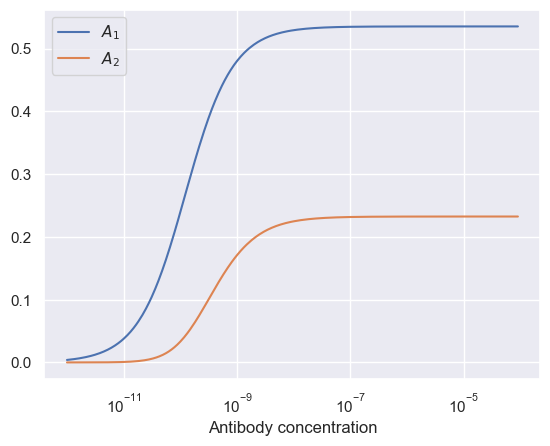

In [541]:
def dimensionless_model(z, A0, delta, beta):
    k = kon*A0
    alpha = k/koff
    dA1 = 2*alpha*(1-z[0]-2*z[1])*(beta-z[0]-z[1]) - gamma*z[0] - delta*alpha*(1-z[0]-2*z[1])*z[0] + 2*gamma*z[1]
    dA2 = delta*alpha*(1-z[0]-2*z[1])*z[0] - 2*gamma*z[1]

    return [dA1, dA2]

vals = np.linspace(1, 9, 50)

A0s1 = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)

A1s = np.ones_like(A0s)
A2s = np.ones_like(A0s)

for i in range(len(A0s)):
    roots = fsolve(dimensionless_model, [0.2, 0.2], args=(A0s[i], delta, beta))
    A1s[i] = roots[0]
    A2s[i] = roots[1]

sns.set_theme()
#plt.scatter(A0s, A1s)
#plt.scatter(A0s, A2s)
plt.plot(A0s, A1s, label = r'$A_1$')
plt.plot(A0s, A2s, label = r'$A_2$')
plt.xscale('log')
plt.xlabel('Antibody concentration')
plt.legend(loc='best')
plt.show()

(10, 10)


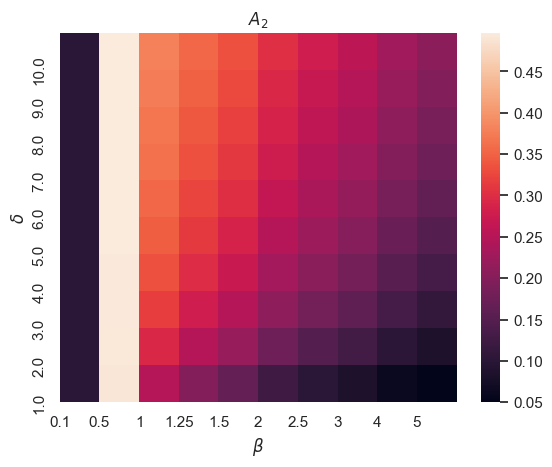

In [542]:
deltas = np.linspace(1, 10, 10)
betas = [0.1, 0.5, 1, 1.25, 1.5, 2, 2.5,  3, 4, 5]

def dimensionless_model1(z, A0, delta1, beta1):
    k = kon*A0
    alpha = k/koff
    dA1 = 2*alpha*(1-z[0]-2*z[1])*(beta1-z[0]-z[1]) - gamma*z[0] - delta1*alpha*(1-z[0]-2*z[1])*z[0] + 2*gamma*z[1]
    dA2 = delta1*alpha*(1-z[0]-2*z[1])*z[0] - 2*gamma*z[1]

    return [dA1, dA2]

def heatmap_vals_A1(delta1, beta1, A0):

    roots = fsolve(dimensionless_model1, [0.2, 0.2], args = (A0, delta1, beta1))

    return roots[0]

def heatmap_vals_A2(delta1, beta1, A0):

    roots = fsolve(dimensionless_model1, [0.2, 0.2], args = (A0, delta1, beta1))

    return roots[1]

X, Y = np.meshgrid(deltas, betas)

A1s = np.ones((len(deltas), len(betas)))

for i in range(len(deltas)):
    for j in range(len(betas)):
        A1s[i][j] = heatmap_vals_A2(deltas[i], betas[j], 1e-5)

print(A1s.shape)

fig, ax = plt.subplots()
sns.heatmap(A1s, yticklabels=True, xticklabels=True, ax=ax)
ax.set_title(r'$A_2$')
ax.invert_yaxis()
ax.set_ylabel(r'$\delta$')
ax.set_xlabel(r'$\beta$')
ax.set_xticks(range(len(deltas)))
ax.set_yticks(range(len(deltas)))
ax.set_yticklabels(deltas)
ax.set_xticklabels(betas)
plt.show()

In [543]:
def jacobian(x):
    f1 = 2*alpha*(-1-beta+2*x[0]+3*x[1]) - 1 - delta*alpha*(1-2*x[0]-2*x[1])
    f2 = 2*alpha*(-1+x[0]-2*beta+2*x[0]+4*x[1])  + 2*delta*alpha*x[0] + 2
    f3 = delta*alpha*(1-2*x[0]-2*x[1])
    f4 = -2*delta*alpha*x[0] - 2

    return [[f1, f2],
             [f3, f4]]

roots = fsolve(dimensionless_model, [0.2, 0.2], args = (1e-5, 4, 1))
print(roots)
print(np.linalg.eig(jacobian(roots)))

[0.33333333 0.33330834]
(array([-4.99981252e+00, -4.00014999e+04]), array([[ 0.8944339 ,  0.70714655],
       [-0.44720018,  0.70706701]]))


In [544]:
beta = 1
delta = 4
A1 = Symbol('A1')
express = 2*alpha*(1-A1 - 2*(delta*alpha*(1-A1)*A1)/(2*(1+delta*alpha*A1)))*(beta-A1-(delta*alpha*(1-A1)*A1)/(2*(1+delta*alpha*A1))) - A1 - delta*alpha*(1-A1-2*(delta*alpha*(1-A1)*A1)/(2*(1+delta*alpha*A1)))*A1 + 2*(delta*alpha*(1-A1)*A1)/(2*(1+delta*alpha*A1))

vals = solveset(express, A1)


In [545]:
print(vals)

{-0.999999999374969, -5.00000001249875e-5, -2.5e-5, 0.333333332708427}


single cell binding model plot of nullclines

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_19823/768219787.py:22: RuntimeWarning: invalid value encountered in sqrt
  return ((2*delta*alpha*x - 2*alpha*beta - 1 - delta*alpha) + (((2*alpha*beta + 1 + delta*alpha - 2*delta*alpha*x)**2 - 4*delta*alpha*(4*alpha*beta*x - 2*alpha*beta - 2*x))**(0.5)))/(2*delta*alpha)


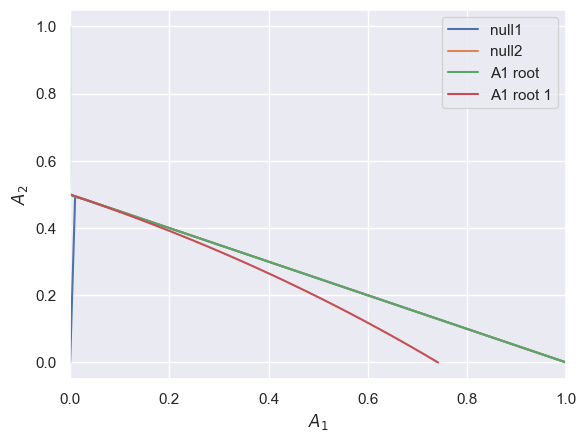

In [546]:
kon = 1e5
Ainit = 1e-5
k = kon*Ainit
alpha = k/koff
beta = 10
delta = 4


def null1(x):

    return (delta*alpha*(1-x)*x)/(2*(1+delta*alpha*x))

def null2(x):
    return (2*alpha*beta*(1-x) - x - delta*alpha*(1-x)*x)/(2*(2*alpha*beta - 1 - delta*alpha*x))

def A1root(x):

    return 0.5*(1-2*x + ((2*x - 1)**2 - (8/(delta*alpha))*x)**(0.5))

def A1root1(x):

    return ((2*delta*alpha*x - 2*alpha*beta - 1 - delta*alpha) + (((2*alpha*beta + 1 + delta*alpha - 2*delta*alpha*x)**2 - 4*delta*alpha*(4*alpha*beta*x - 2*alpha*beta - 2*x))**(0.5)))/(2*delta*alpha)

def nan_to_zero(vals):
    array = np.zeros_like(vals)
    for i in range(len(vals)):
        if vals[i] == nan:
            array[i] == 0
        else: array[i] = vals[i]
    
    return array

A1s = np.linspace(0, 1, 100)

plt.plot(A1s, null1(A1s), label = 'null1')
plt.plot(A1s, null2(A1s), label = 'null2')
plt.plot(A1root(A1s), A1s, label = 'A1 root')
plt.plot(A1root1(A1s), A1s, label = 'A1 root 1')
plt.legend()
plt.xlabel(r'$A_1$')
plt.ylabel(r'$A_2$')
plt.xlim([0, 1])
plt.show()